**Loading data**

In [1]:
import pandas as pd
df = pd.read_csv('insurance.csv')

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.924
1,18.0,male,33.770,1.0,no,Southeast,1725.5523
2,28.0,male,33.000,3.0,no,southeast,$4449.462
3,33.0,male,22.705,0.0,no,northwest,$21984.47061
4,32.0,male,28.880,0.0,no,northwest,$3866.8552


**Exploring data**

In [2]:
df.shape

(1338, 7)

In [3]:
df.describe()

,age,bmi,children
count,1272.000000,1272.000000,1272.000000
mean,35.214623,30.560550,0.948899
std,22.478251,6.095573,1.303532
min,-64.000000,15.960000,-4.000000
25%,24.750000,26.180000,0.000000
50%,38.000000,30.210000,1.000000
75%,51.000000,34.485000,2.000000
max,64.000000,53.130000,5.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1272 non-null   float64
 1   sex       1272 non-null   object 
 2   bmi       1272 non-null   float64
 3   children  1272 non-null   float64
 4   smoker    1272 non-null   object 
 5   region    1272 non-null   object 
 6   charges   1284 non-null   object 
dtypes: float64(3), object(4)
memory usage: 73.3+ KB


In [5]:
df.dtypes

,0
age,float64
sex,object
bmi,float64
children,float64
smoker,object
region,object
charges,object


In [6]:
print(f"Sex: {df['sex'].unique()}")

Sex: ['female' 'male' 'woman' 'F' 'man' nan 'M']


In [7]:
df['region'].unique()

array(['southwest', 'Southeast', 'southeast', 'northwest', 'Northwest',
       'Northeast', 'northeast', 'Southwest', nan], dtype=object)

In [8]:
df['sex'].unique()

array(['female', 'male', 'woman', 'F', 'man', nan, 'M'], dtype=object)

# **Cleaning Data**<br>
**1. Are thre any missing values**<br>
**2. Standardize Categories in region**<br>
**3. Standardize Sex Column** <br>
**4. Change Smoker column to boolean**<br>
**4. Standardize Charges**

In [9]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.924
1,18.0,male,33.770,1.0,no,Southeast,1725.5523
2,28.0,male,33.000,3.0,no,southeast,$4449.462
3,33.0,male,22.705,0.0,no,northwest,$21984.47061
4,32.0,male,28.880,0.0,no,northwest,$3866.8552


In [10]:
df_filled = df.dropna().copy()

In [11]:
df_filled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1208 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1208 non-null   float64
 1   sex       1208 non-null   object 
 2   bmi       1208 non-null   float64
 3   children  1208 non-null   float64
 4   smoker    1208 non-null   object 
 5   region    1208 non-null   object 
 6   charges   1208 non-null   object 
dtypes: float64(3), object(4)
memory usage: 75.5+ KB


In [12]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.924
1,18.0,male,33.770,1.0,no,Southeast,1725.5523
2,28.0,male,33.000,3.0,no,southeast,$4449.462
3,33.0,male,22.705,0.0,no,northwest,$21984.47061
4,32.0,male,28.880,0.0,no,northwest,$3866.8552


**Region**

In [13]:
df_filled['region'].unique()

array(['southwest', 'Southeast', 'southeast', 'northwest', 'Northwest',
       'Northeast', 'northeast', 'Southwest'], dtype=object)

In [14]:
df_filled['region'] = df_filled['region'].str.lower()

In [15]:
df_filled['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

**Sex**

In [16]:
df_filled['sex'].unique()

array(['female', 'male', 'woman', 'F', 'man', 'M'], dtype=object)

In [17]:
FEMALE = 'female'
MALE = 'male'

sex_map = {'F': FEMALE, 'woman': FEMALE, 'man': MALE, 'M': MALE}

df_filled['sex'] = df_filled['sex'].replace(sex_map)


In [18]:
df_filled['sex'].unique()

array(['female', 'male'], dtype=object)

**Smoker**

In [19]:
df_filled['smoker'] = (df_filled['smoker'] == 'yes')
df_filled.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,True,southwest,16884.924
1,18.0,male,33.770,1.0,False,southeast,1725.5523
2,28.0,male,33.000,3.0,False,southeast,$4449.462
3,33.0,male,22.705,0.0,False,northwest,$21984.47061
4,32.0,male,28.880,0.0,False,northwest,$3866.8552


In [20]:
df_filled['smoker'].unique()

array([ True, False])

**Charges**

In [21]:
df_filled['charges'] = df['charges'].str.strip('$').astype('float64')

In [22]:
df_filled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1208 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1208 non-null   float64
 1   sex       1208 non-null   object 
 2   bmi       1208 non-null   float64
 3   children  1208 non-null   float64
 4   smoker    1208 non-null   bool   
 5   region    1208 non-null   object 
 6   charges   1207 non-null   float64
dtypes: bool(1), float64(4), object(2)
memory usage: 67.2+ KB


**Removing Negative Ages**

In [23]:
df_filled['age'] = df_filled['age'].abs()

In [24]:
df_filled['age'].sample(10)

,age
351,50.0
871,26.0
442,18.0
552,62.0
862,55.0
1229,58.0
1136,44.0
771,53.0
786,60.0
1245,28.0


**Saving the cleaned dataset**

In [25]:
df_filled.to_csv('insurance_cleaned.csv', index=False)

# Relationship between columns

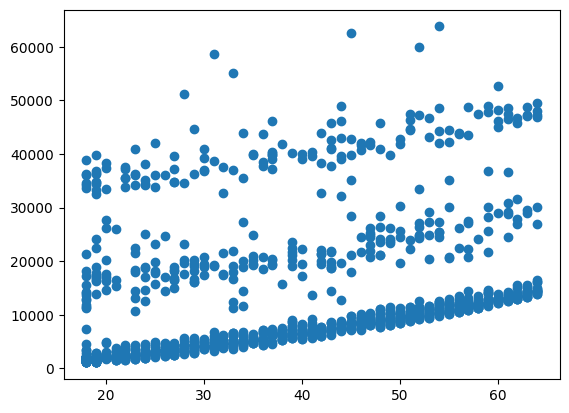

In [26]:
import matplotlib.pyplot as plt

df = df_filled.copy()

plt.scatter(df['age'], df['charges'])

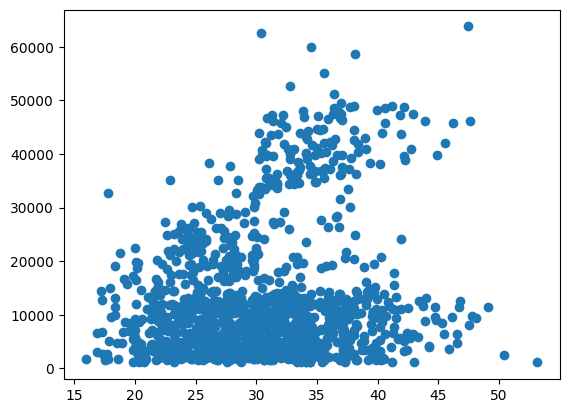

In [27]:
plt.scatter(df['bmi'], df['charges'])

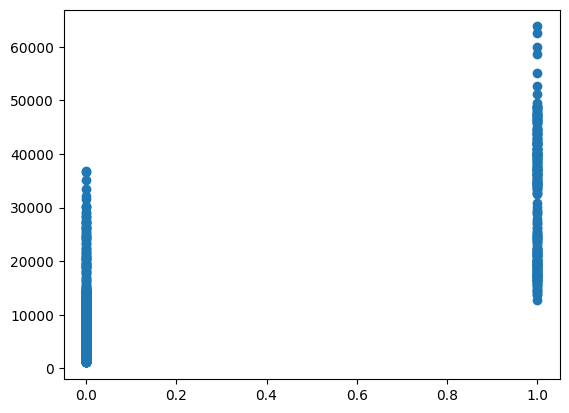

In [28]:
plt.scatter(df['smoker'], df['charges'])

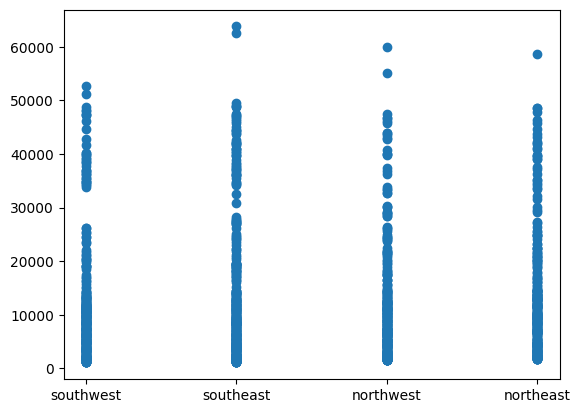

In [29]:
plt.scatter(df['region'], df['charges'])

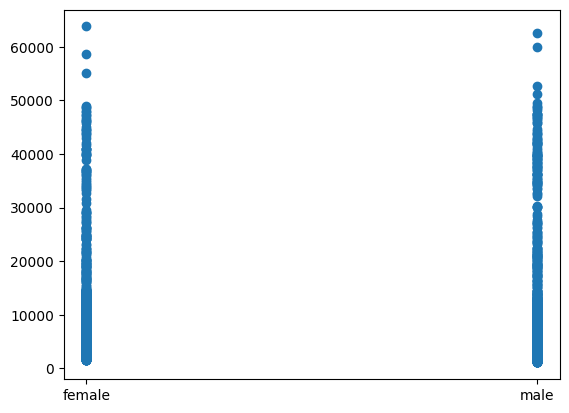

In [30]:
plt.scatter(df['sex'], df['charges'])

# Prepare the data for model fitting

In [31]:
df_new = pd.get_dummies(df, prefix = ['region'], columns = ['region'])
df_new = df_new.drop(columns=['region_southeast'])
# Convert boolean region columns to integers (0 and 1)
region_cols = [col for col in df_new.columns if col.startswith('region_')]
for col in region_cols:
    df_new[col] = df_new[col].astype(int)
df_new.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southwest
0,19.0,female,27.900,0.0,True,16884.92400,0,0,1
1,18.0,male,33.770,1.0,False,1725.55230,0,0,0
2,28.0,male,33.000,3.0,False,4449.46200,0,0,0
3,33.0,male,22.705,0.0,False,21984.47061,0,1,0
4,32.0,male,28.880,0.0,False,3866.85520,0,1,0


In [32]:
df_new['smoker'] = df_new['smoker'].astype('int64')
df_new

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southwest
0,19.0,female,27.900,0.0,1,16884.92400,0,0,1
1,18.0,male,33.770,1.0,0,1725.55230,0,0,0
2,28.0,male,33.000,3.0,0,4449.46200,0,0,0
3,33.0,male,22.705,0.0,0,21984.47061,0,1,0
4,32.0,male,28.880,0.0,0,3866.85520,0,1,0
...,...,...,...,...,...,...,...,...,...
1333,50.0,male,30.970,3.0,0,10600.54830,0,1,0
1334,18.0,female,31.920,0.0,0,2205.98080,1,0,0
1335,18.0,female,36.850,0.0,0,1629.83350,0,0,0
1336,21.0,female,25.800,0.0,0,2007.94500,0,0,1


In [33]:
df_new['is_male'] = (df['sex'] == 'male').astype('int64')
df_new.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southwest,is_male
0,19.0,female,27.900,0.0,1,16884.92400,0,0,1,0
1,18.0,male,33.770,1.0,0,1725.55230,0,0,0,1
2,28.0,male,33.000,3.0,0,4449.46200,0,0,0,1
3,33.0,male,22.705,0.0,0,21984.47061,0,1,0,1
4,32.0,male,28.880,0.0,0,3866.85520,0,1,0,1


In [34]:
df_new.drop(columns=['sex'])

,age,bmi,children,smoker,charges,region_northeast,region_northwest,region_southwest,is_male
0,19.0,27.900,0.0,1,16884.92400,0,0,1,0
1,18.0,33.770,1.0,0,1725.55230,0,0,0,1
2,28.0,33.000,3.0,0,4449.46200,0,0,0,1
3,33.0,22.705,0.0,0,21984.47061,0,1,0,1
4,32.0,28.880,0.0,0,3866.85520,0,1,0,1
...,...,...,...,...,...,...,...,...,...
1333,50.0,30.970,3.0,0,10600.54830,0,1,0,1
1334,18.0,31.920,0.0,0,2205.98080,1,0,0,0
1335,18.0,36.850,0.0,0,1629.83350,0,0,0,0
1336,21.0,25.800,0.0,0,2007.94500,0,0,1,0


In [35]:
df_new.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southwest,is_male
0,19.0,female,27.900,0.0,1,16884.92400,0,0,1,0
1,18.0,male,33.770,1.0,0,1725.55230,0,0,0,1
2,28.0,male,33.000,3.0,0,4449.46200,0,0,0,1
3,33.0,male,22.705,0.0,0,21984.47061,0,1,0,1
4,32.0,male,28.880,0.0,0,3866.85520,0,1,0,1


# Fit the data into Linear Regression Model

In [36]:
df_new.dropna()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southwest,is_male
0,19.0,female,27.900,0.0,1,16884.92400,0,0,1,0
1,18.0,male,33.770,1.0,0,1725.55230,0,0,0,1
2,28.0,male,33.000,3.0,0,4449.46200,0,0,0,1
3,33.0,male,22.705,0.0,0,21984.47061,0,1,0,1
4,32.0,male,28.880,0.0,0,3866.85520,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
1333,50.0,male,30.970,3.0,0,10600.54830,0,1,0,1
1334,18.0,female,31.920,0.0,0,2205.98080,1,0,0,0
1335,18.0,female,36.850,0.0,0,1629.83350,0,0,0,0
1336,21.0,female,25.800,0.0,0,2007.94500,0,0,1,0


**Verify data consistency**

**Subtask:**
Check the info of `df_new` to confirm that all columns now have the same number of non-null entries.


In [37]:
df_new.dropna(subset=['charges'], inplace=True)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1207 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1207 non-null   float64
 1   sex               1207 non-null   object 
 2   bmi               1207 non-null   float64
 3   children          1207 non-null   float64
 4   smoker            1207 non-null   int64  
 5   charges           1207 non-null   float64
 6   region_northeast  1207 non-null   int64  
 7   region_northwest  1207 non-null   int64  
 8   region_southwest  1207 non-null   int64  
 9   is_male           1207 non-null   int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 103.7+ KB


**Traning a model**

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

#Defining input and output variables
X = df_new.drop(columns=['charges', 'sex'])
y = df_new['charges']

print(df_new.info())
print(y.info())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

#Making predictions
y_pred = model.predict(X_test)

#Evaluating the model
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

<class 'pandas.core.frame.DataFrame'>
Index: 1207 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1207 non-null   float64
 1   sex               1207 non-null   object 
 2   bmi               1207 non-null   float64
 3   children          1207 non-null   float64
 4   smoker            1207 non-null   int64  
 5   charges           1207 non-null   float64
 6   region_northeast  1207 non-null   int64  
 7   region_northwest  1207 non-null   int64  
 8   region_southwest  1207 non-null   int64  
 9   is_male           1207 non-null   int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 103.7+ KB
None
<class 'pandas.core.series.Series'>
Index: 1207 entries, 0 to 1337
Series name: charges
Non-Null Count  Dtype  
--------------  -----  
1207 non-null   float64
dtypes: float64(1)
memory usage: 18.9 KB
None
R-squared: 0.7048413291217553


# Seeing how dataset performs on validatin dataset

In [39]:
val_df = pd.read_csv('validation_dataset.csv')
val_df.head()

,age,sex,bmi,children,smoker,region
0,18.0,female,24.090000,1.0,no,southeast
1,39.0,male,26.410000,0.0,yes,northeast
2,27.0,male,29.150000,0.0,yes,southeast
3,71.0,male,65.502135,13.0,yes,southeast
4,28.0,male,38.060000,0.0,no,southeast


**Subtask - Creating a helper function to preprocess dataframe**

In [40]:
def preprocess_dataframe(df):
    """
    Preprocesses the dataframe by:
    1. Encoding categorical variables
    2. Converting smoker to binary
    3. Creating dummy variables for region
    4. Ensuring all data types are numeric
    """
    df_processed = df.copy()

    # Convert smoker to binary (yes=1, no=0)
    df_processed['smoker'] = (df_processed['smoker'] == 'yes').astype(int)

    # Create dummy variables for region
    region_dummies = pd.get_dummies(df_processed['region'].str.lower(), prefix='region')
    df_processed = pd.concat([df_processed, region_dummies], axis=1)

    # Create binary variable for sex
    df_processed['is_male'] = (df_processed['sex'] == 'male').astype(int)

    # Drop the original categorical columns
    df_processed = df_processed.drop(columns=['region', 'sex'])

    return df_processed

**Preprocessing Validation Dataset**

In [41]:
# Preprocess the validation dataset
val_df_processed = preprocess_dataframe(val_df)
print("Validation dataset after preprocessing:")
val_df_processed.head()

Validation dataset after preprocessing:


,age,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest,is_male
0,18.0,24.090000,1.0,0,False,False,True,False,0
1,39.0,26.410000,0.0,1,True,False,False,False,1
2,27.0,29.150000,0.0,1,False,False,True,False,1
3,71.0,65.502135,13.0,1,False,False,True,False,1
4,28.0,38.060000,0.0,0,False,False,True,False,1


**Preparing Training and Validation Sets**

In [42]:
# Prepare training data
X_train = df_new.drop(columns=['charges', 'sex'])  # Drop charges (target) and sex (already encoded as is_male)
y_train = df_new['charges']

# Prepare validation data (assuming charges column exists)
# Note: The validation dataset needs to have the same features as training
# We'll need to ensure all region columns exist

# Get all region columns from training set
region_cols = [col for col in X_train.columns if col.startswith('region_')]

# Ensure validation set has all region columns
for col in region_cols:
    if col not in val_df_processed.columns:
        val_df_processed[col] = 0

# Ensure validation set has is_male column
if 'is_male' not in val_df_processed.columns:
    val_df_processed['is_male'] = 0

# Prepare X_val with same columns as X_train
feature_cols = X_train.columns.tolist()
X_val = val_df_processed[feature_cols]

print(f"Training set shape: {X_train.shape}")
print(f"Validation set shape: {X_val.shape}")
print(f"\nFeature columns: {feature_cols}")

Training set shape: (1207, 8)
Validation set shape: (50, 8)

Feature columns: ['age', 'bmi', 'children', 'smoker', 'region_northeast', 'region_northwest', 'region_southwest', 'is_male']


**Training Linear Regression Model**

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on training set
y_train_pred = model.predict(X_train)

# Calculate training metrics
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

print("="*50)
print("TRAINING SET PERFORMANCE")
print("="*50)
print(f"Mean Squared Error (MSE): ${train_mse:,.2f}")
print(f"Root Mean Squared Error (RMSE): ${train_rmse:,.2f}")
print(f"Mean Absolute Error (MAE): ${train_mae:,.2f}")
print(f"R² Score: {train_r2:.4f}")
print()

print("Model Coefficients:")
for feature, coef in zip(feature_cols, model.coef_):
    print(f"{feature:20s}: ${coef:,.2f}")
print(f"{'Intercept':20s}: ${model.intercept_:,.2f}")

TRAINING SET PERFORMANCE
Mean Squared Error (MSE): $37,040,359.31
Root Mean Squared Error (RMSE): $6,086.08
Mean Absolute Error (MAE): $4,185.56
R² Score: 0.7483

Model Coefficients:
age                 : $259.53
bmi                 : $327.75
children            : $328.66
smoker              : $23,956.98
region_northeast    : $839.44
region_northwest    : $560.72
region_southwest    : $5.22
is_male             : $-266.38
Intercept           : $-12,330.69


**Evaluating Model on Validation Set**

In [44]:
# Note: If validation set doesn't have target values (charges), we can only make predictions
# For now, let's make predictions on the validation set

# Make predictions on validation set
y_val_pred = model.predict(X_val)

print("="*50)
print("VALIDATION SET PREDICTIONS")
print("="*50)
print(f"Number of predictions: {len(y_val_pred)}")
print(f"\nPrediction Statistics:")
print(f"Mean predicted charge: ${y_val_pred.mean():,.2f}")
print(f"Min predicted charge: ${y_val_pred.min():,.2f}")
print(f"Max predicted charge: ${y_val_pred.max():,.2f}")
print(f"Std predicted charge: ${y_val_pred.std():,.2f}")

# Display first 10 predictions with input features
print("\nFirst 10 Predictions:")
val_predictions_df = X_val.copy()
val_predictions_df['Predicted_Charges'] = y_val_pred
print(val_predictions_df.head(10))

VALIDATION SET PREDICTIONS
Number of predictions: 50

Prediction Statistics:
Mean predicted charge: $22,549.69
Min predicted charge: $-129.83
Max predicted charge: $66,707.03
Std predicted charge: $19,351.68

First 10 Predictions:
    age        bmi  children  smoker  region_northeast  region_northwest  \
0  18.0  24.090000       1.0       0             False             False   
1  39.0  26.410000       0.0       1              True             False   
2  27.0  29.150000       0.0       1             False             False   
3  71.0  65.502135      13.0       1             False             False   
4  28.0  38.060000       0.0       0             False             False   
5  70.0  72.958351      11.0       1             False             False   
6  29.0  32.110000       2.0       0             False              True   
7  42.0  41.325000       1.0       0              True             False   
8  48.0  36.575000       0.0       0             False              True   
9  63.0  